In [2]:
# Assessed exercises 7
# Look at cuts and creating ROC curves

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [40]:
path = '/Users/joshward/Desktop/Fin. Math/Y4S1/Data Programming/ebola_test.csv'
eb = pd.read_csv(path)

### Q1 Write a function that returns a dict with some information about the DataFrame df. The keys of the dict should be 'Percentage' and 'Quartiles'. The  value for 'Percentage' should be a single number (not a list with a number in it), specifying the percentage of entries with positive results for the given criteria, i.e. indicator variable is 1. This value should be rounded to 1 decimal place. The value for 'Quartiles' should be a list (not a Series or  array) with the number of observations in the 1st quartile (0-25%), 2nd  quartile (25-50%), 3rd quartile (50-75%) and 4th quartile (75-100%) for a specified observation column.  The name of the indicator and observation variable should be given to the  function as strings. Be sure that your keys are exactly as specified above and that the values have the data type specified above.

In [41]:
def exercise1(df,ind_col,obs_col):
    return {'Percentage':round(pd.get_dummies(df[ind_col]).mean()[1]*100,1),
            'Quartiles':[pd.qcut(df[obs_col],4).value_counts()[i] for i in range(0,4)]}
    
# Suggested test
exercise1(eb,'ebola','prob')
# This should return 
# {'Percentage': 10.4, 'Quartiles': [128, 125, 125, 121]}

{'Percentage': 10.4, 'Quartiles': [128, 125, 125, 121]}

### Q2 Write a function that takes a DataFrame, two strings specifying the names of  indicator column and the observation column, and a cutoff value, and returns the rate of false positive and rate of the false negative as a dict. The keys of the dict should be 'False Pos' and 'False Neg' and the values  must be rounded to 3 decimal places. 

In [42]:
def exercise2(df,ind_col,obs_col,cutoff):
    
    df['False Pos'] = df.apply(lambda x: 0, axis=1)
    df['False Neg'] = df.apply(lambda x: 0, axis=1)
    
    for i in range(0,len(df)):
        if df[ind_col][i] == 1:
            if df[obs_col][i] <= cutoff: #Only above this are classified as positives
                df['False Neg'][i] = 1
        if df[ind_col][i] == 0:
            if df[obs_col][i] > cutoff:
                df['False Pos'][i] = 1
    return {'False Pos':float(round(sum(df['False Pos'])/len(df),3)),
            'False Neg':float(round(sum(df['False Neg'])/len(df),3))}
            
# Suggested test
exercise2(eb,'ebola','prob',0.15)
# This should return 
# {'False Pos': 0.126, 'False Neg': 0.07}

{'False Neg': 0.07, 'False Pos': 0.126}

### Q3 Write a function that takes the same inputs as Q2, but cutoff will now be replaced with cutoff_list (an array of different cutoff values to test). The  function should run the classification for each value in cutoff_list and  determine which is the best cutoff value. We will define the best classifier  as having the lowest false results (false positives plus false negatives). The  function should return a dict with the keys 'Cutoff value', 'False Pos' and  'False Neg', and the values of the false positive rate and false negative rate  should be roundedto 3 decimal places

In [43]:
def exercise3(df,ind_col,obs_col,cutoff_list):
    sum_fp_fn = []
    for i in range(0,len(cutoff_list)):
        x = exercise2(df,ind_col,obs_col,cutoff_list[i])
        sum_fp_fn.append(x['False Pos']+x['False Neg'])
    
    d = dict(zip(cutoff_list,sum_fp_fn))
    m = min(d,key=d.get)
    
    min_answer = exercise2(df,ind_col,obs_col,m)
    return {'Cutoff value': float(round(m,2)),
            'False Pos':float(round(min_answer['False Pos'],3)),
            'False Neg':float(round(min_answer['False Neg'],3))}
        
    
# Suggested test
exercise3(eb,'ebola','prob',np.arange(0,1,0.01))
# This should return 
# {'Cutoff value': 0.21, 'False Pos': 0.0, 'False Neg': 0.102}

{'Cutoff value': 0.21, 'False Neg': 0.102, 'False Pos': 0.0}

### Q4 Write a function which calculates the ROC curve. The function should have  three arguments, the DataFrame df, the name of the indicator variable ind_col and the name of the observation variable obs_col Your ROC curve function should perform the following steps 1) Find the unique values in the observation column 2) Use each of these unique values as a cutoff value and a) Classify all the obs as either positive or negative based on the current cutoff value b) Calculate the number of true positives (tp), true negatives (tn), false positives (fp) and false negatives (fn) Note 1: a tp is when the classification value and actual value are both 1, a tn is when they're both 0 Note 2: tp, fn, etc must all be vectors/Series of the same length as the vector/Series of cutoff values  Note 4: be careful when you're at the maximum cutoff value that you can still calculate these values correctly 3) Create the true positive rate (tpr) as tp/(tp+fn) 4) Create the false positive rate (fpr) as fp/(fp+tn) 5) Create a DataFrame, indexed by the cutoff values (unique values of  observation column), with columns 'True_Pos' and 'False_Pos', containing tpr  and fpr, respectively.  6) Return the DataFrame sorted by index (lowest to highest)

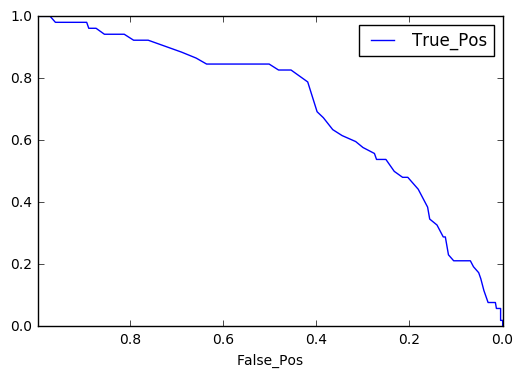

In [44]:
def exercise4(df,ind_col,obs_col):
    cutoff = df[obs_col].drop_duplicates()
    TPR = []
    FPR = []
    for i in cutoff:
        df['TP']=[1 if (df[ind_col][j] == 1) & (df[obs_col][j] > i)  else 0 for j in range(0,len(df))]
        df['FP']=[1 if (df[ind_col][j] == 0) & (df[obs_col][j] > i)  else 0 for j in range(0,len(df))]
        df['TN']=[1 if (df[ind_col][j] == 0) & (df[obs_col][j] <= i)  else 0 for j in range(0,len(df))]
        df['FN']=[1 if (df[ind_col][j] == 1) & (df[obs_col][j] <= i)  else 0 for j in range(0,len(df))]

        if (sum(df['TP'])+sum(df['FN'])) == 0:
            TPR.append(0)
        else:
            TPR.append(sum(df['TP'])/(sum(df['TP'])+sum(df['FN'])))
        if (sum(df['FP'])+sum(df['TN'])) == 0:
            FPR.append(0)
        else:
            FPR.append(sum(df['FP'])/(sum(df['FP'])+sum(df['TN'])))
            
    TPR = Series(TPR,index=cutoff)
    FPR = Series(FPR,index=cutoff)
    data = DataFrame({'True_Pos':TPR,'False_Pos':FPR},index=cutoff)
    return data.sort_index()
        
# Suggested test
Q4_ans = exercise4(eb,'ebola','prob')
Q4_ans.plot(x='False_Pos',y='True_Pos')
plt.show()
# This should create a plot of the false positive rate vs true positive rate.
# When the false positive rate is ~0.5, the true positive rate is ~0.85